In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.integrate
from matplotlib import cm
from scipy import fft
from matplotlib.animation import FuncAnimation, PillowWriter 
from concurrent.futures import ThreadPoolExecutor
import pandas as pd
import time

In [11]:
det_data = np.load('/Users/javier/Desktop/Files from Cluster/Large volatilities/det_soliton_data.npy')
z = np.load('full_data_soliton/data_from_colab/collocation_points_soliton.npy')
t = np.linspace(0,3,100)#np.load('full_data_soliton/data_from_colab/times_soliton.npy')
Z,T = np.meshgrid(z,t)

In [12]:
vol_point_01 = np.load('full_data_soliton/data_from_colab/data_soliton_march1_vol_0.01_alpha_0.95_epsilon_0.1_Ma_0.2_N_iter_100.npy')
vol_point_05 = np.load('full_data_soliton/data_from_colab/data_soliton_march2_vol_0.05_alpha_0.95_epsilon_0.1_Ma_0.2_N_iter_100.npy')
vol_point_1 = np.load('full_data_soliton/data_from_colab/data_soliton_march1_vol_0.1_alpha_0.95_epsilon_0.1_Ma_0.2_N_iter_100.npy')
vol_point_25 = np.load('full_data_soliton/data_from_colab/data_soliton_march12_vol_0.25_alpha_0.95_epsilon_0.1_Ma_0.2_N_iter_100.npy')
vol_point_5 = np.load('full_data_soliton/data_from_colab/data_soliton_march12_vol_0.5_alpha_0.95_epsilon_0.1_Ma_0.2_N_iter_100.npy')
vol_1 = np.load('full_data_soliton/data_from_colab/data_soliton_march12_vol_1_alpha_0.95_epsilon_0.1_Ma_0.2_N_iter_100.npy')
vol_2 = np.load('full_data_soliton/data_from_colab/data_soliton_march12_vol_2_alpha_0.95_epsilon_0.1_Ma_0.2_N_iter_100.npy')
volatility_list = np.array([ 0.01,0.05, 0.1,0.25, 0.5,1,2], dtype=float)
big_array_old = np.stack((vol_point_01, vol_point_05, vol_point_1, 
                      vol_point_25, vol_point_5, vol_1, vol_2), axis=0)
#np.shape(big_array)
big_array_large_vol = np.load('/Users/javier/Desktop/Files from Cluster/Large volatilities/results.npy')
big_array_small_vol =np.load('/Users/javier/Desktop/Files from Cluster/small_volatilities/results.npy')
small_volatilities = np.load('/Users/javier/Desktop/Files from Cluster/small_volatilities/volatilities.npy')
big_array_extra_middle = np.load('/Users/javier/Desktop/Imperial College London/M4R/Codes/Stochastic system/full_data_soliton/extra0_5_vol/results.npy')
med_volatilities = np.array([0.01,0.05, 0.1, .25,.5,1,2])
big_volatilities = np.load('/Users/javier/Desktop/Files from Cluster/Large volatilities/volatilities.npy')
big_array_bigger_vol = np.load('/Users/javier/Desktop/Imperial College London/M4R/Codes/Stochastic system/full_data_soliton/custer_large_vol/results.npy')
bigger_vol = np.load('/Users/javier/Desktop/Imperial College London/M4R/Codes/Stochastic system/full_data_soliton/custer_large_vol/volatilities.npy')
extra_middle_vol = np.load('/Users/javier/Desktop/Imperial College London/M4R/Codes/Stochastic system/full_data_soliton/extra0_5_vol/volatilities.npy')
volatilities = np.concatenate([small_volatilities, med_volatilities])
big_array = np.concatenate([big_array_small_vol, big_array_old], axis=0)

In [6]:
plt.figure(dpi=500)
mean_data = np.zeros((len(t), len(volatilities)+len(biger_vol)))

counter = np.zeros(len(volatilities)+len(biger_vol))
plt.plot(t, np.max(det_data, axis=0),'--', color='black')
plt.title('Stochastic decay of the solitary wave');plt.xlabel(r'Time, $t$')
plt.ylabel(r'Maximum film height, $\operatorname{Max}\{\eta(\xi)\}$');plt.xlim([0,3]);plt.grid()
for j,vol in enumerate(volatilities):
    mean_data[:,j] += np.max(np.mean(big_array[j,:,:,:], axis=-1), axis=0)
    counter[j]+=np.shape(big_array)
    plt.plot(t, np.max(np.mean(big_array[j,:,:,:], axis=-1), axis=0), label=f'{vol}')
for j, vol in enumerate(big_volatilities):
    mean_data[:,j] += np.max(np.mean(big_array_large_vol[j,:,:,:], axis=-1), axis=0)
    counter[j] += 1
    plt.plot(t, np.max(np.mean(big_array_large_vol[j,:,:,:], axis=-1), axis=0), label=f'{vol}')
for j, vol in enumerate(bigger_vol):
    plt.plot(t, np.max(np.mean(big_array_bigger_vol[j,:,:,:], axis=-1), axis=0), label=f'{vol}')
plt.legend()

NameError: name 'biger_vol' is not defined

<Figure size 3000x2000 with 0 Axes>

100.0
100.0
100.0
100.0
100.0
100.0
400.0
300.0
900.0
800.0
900.0


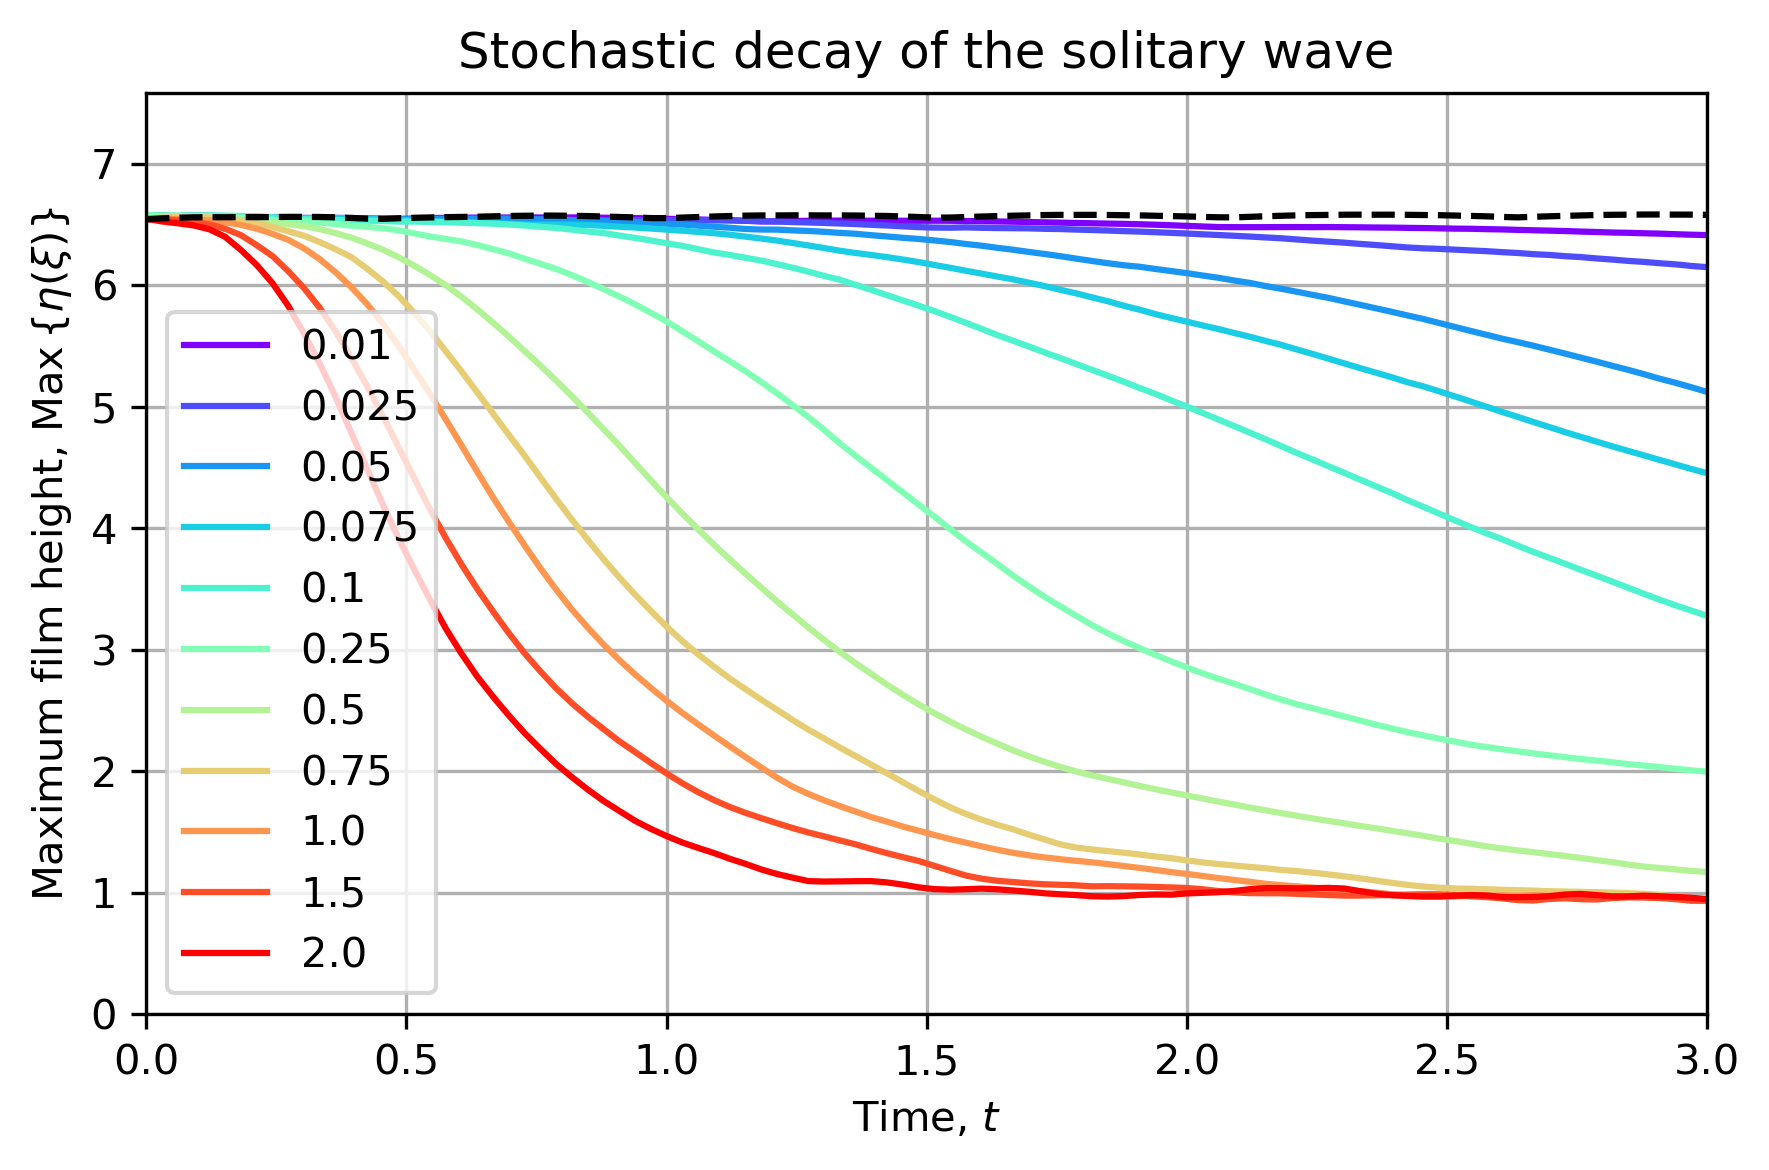

In [8]:
plt.figure(dpi=300)

plt.title('Stochastic decay of the solitary wave');plt.xlabel(r'Time, $t$');plt.xlim([0,3])
plt.ylabel(r'Maximum film height, $\operatorname{Max}\{\eta(\xi)\}$');plt.grid();plt.ylim([0, np.max(det_data)+1])

#vol_list_final = np.array([0.0025,0.005,0.0075,0.025,0.075,0.01,0.05,0.1,0.25,0.5,1.,1.5,2.])
vol_list_final = np.array([0.01, 0.025,0.05,0.075, 0.1,0.25,0.5,0.75,1.,1.5,2.])
amount_of_each_vol = np.zeros_like(vol_list_final)
sum_data = np.zeros((len(t), len(vol_list_final)))
mean_data = np.zeros((len(t), len(vol_list_final)))
colors = plt.cm.rainbow(np.linspace(0, 1, len(vol_list_final)))
for j,vol in enumerate(vol_list_final):
    if vol in volatilities:
        #search index
        k = np.where(volatilities==vol)[0][0]
        sum_data[:,j] += np.max(np.sum(big_array[k,:,:,:], axis=-1), axis=0)
        amount_of_each_vol[j] += np.shape(big_array)[-1]
    if vol in bigger_vol:
        #search index
        k = np.where(bigger_vol==vol)[0][0]
        sum_data[:,j] += np.max(np.sum(big_array_bigger_vol[k,:,:,:], axis=-1), axis=0)
        amount_of_each_vol[j] += np.shape(big_array_bigger_vol)[-1]
    if vol in big_volatilities:
        #search index
        k = np.where(big_volatilities==vol)[0][0]
        sum_data[:,j] += np.max(np.sum(big_array_large_vol[k,:,:,:], axis=-1), axis=0)
        amount_of_each_vol[j] += np.shape(big_array_large_vol)[-1]
    if vol in extra_middle_vol:
        #search index
        k = np.where(extra_middle_vol==vol)[0][0]
        sum_data[:,j] += np.max(np.sum(big_array_extra_middle[k,:,:,:], axis=-1), axis=0)
        amount_of_each_vol[j] += np.shape(big_array_extra_middle)[-1]
    print(amount_of_each_vol[j])
    mean_data[:,j] = sum_data[:,j]/amount_of_each_vol[j]
    plt.plot(t, mean_data[:,j], label=f'{vol}', color=colors[j])
plt.legend()
plt.plot(t, np.max(det_data, axis=0),'--', color='black')
plt.tight_layout()
plt.savefig('decay_of_stoch_soliton_line_plot.pdf')


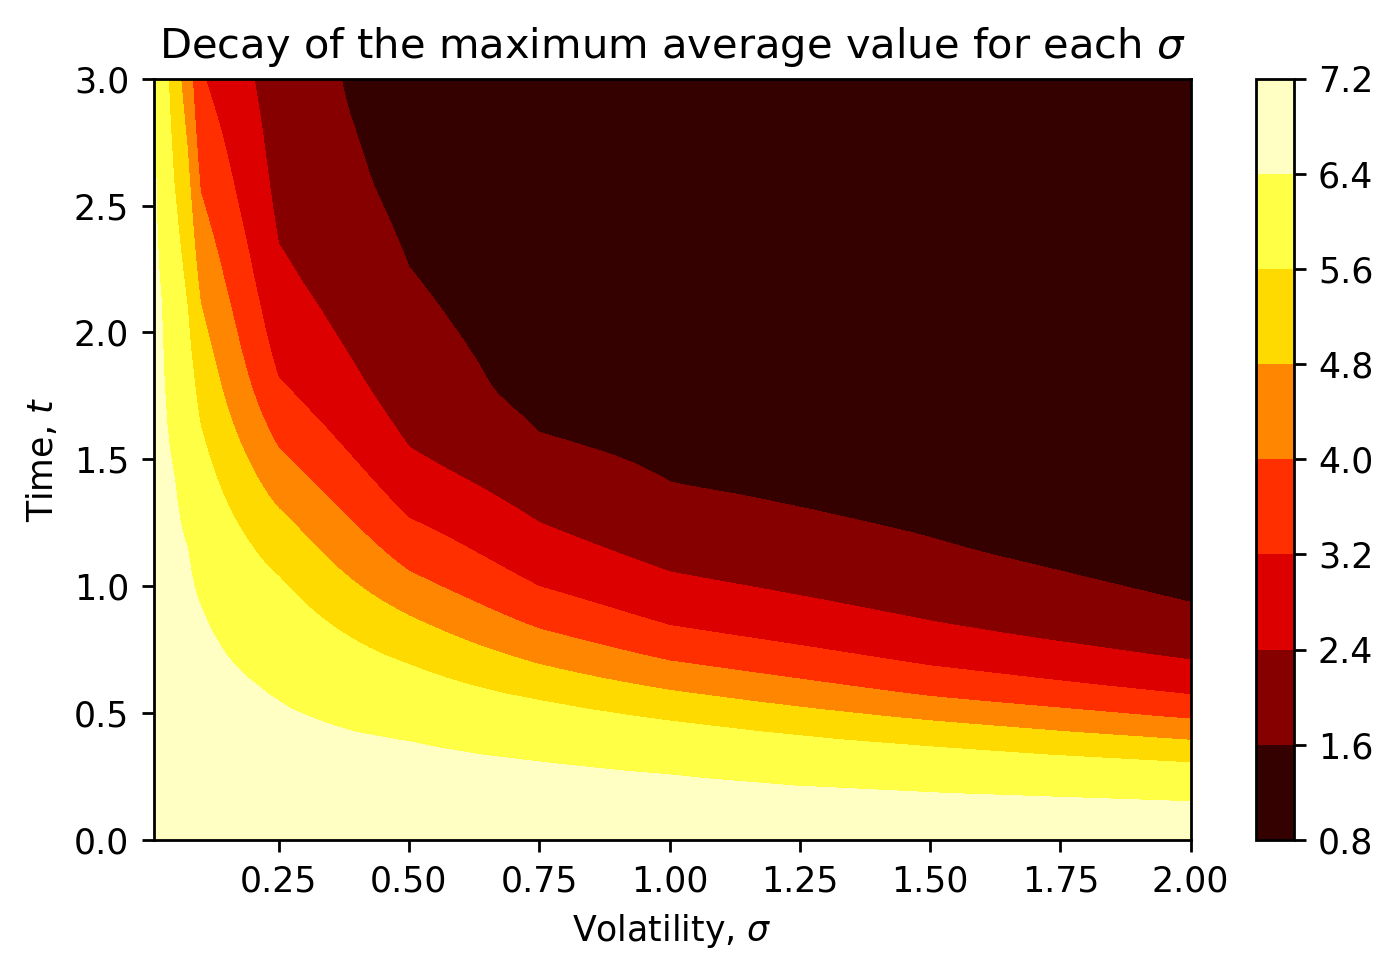

In [9]:
T2, V = np.meshgrid(t, vol_list_final)
plt.figure(dpi=250)
plt.contourf(V,T2, mean_data.T, cmap='hot'); plt.colorbar()
plt.xlabel(r'Volatility, $\sigma$')
plt.ylabel(r'Time, $t$')
plt.title(r'Decay of the maximum average value for each $\sigma$')
plt.tight_layout()
plt.savefig('decay_soliton_contourf.pdf')
plt.show()

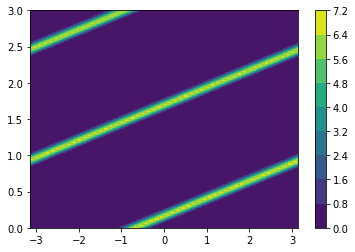

In [43]:
#plt.contourf(Z,T,np.mean(vol_point_01, axis=-1).T); plt.colorbar()

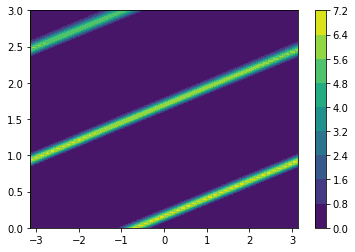

In [44]:
plt.contourf(Z,T, np.mean(vol_point_05, axis=-1).T);plt.colorbar()

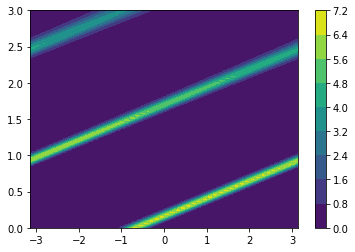

In [45]:
plt.contourf(Z,T,np.mean(vol_point_1, axis=-1).T);plt.colorbar()

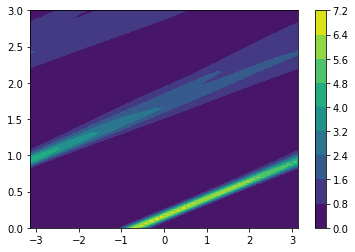

In [95]:
plt.contourf(Z,T,np.mean(vol_point_5, axis=-1).T);plt.colorbar()

In [146]:
#plt.contourf(Z,T,det_data.T);plt.colorbar()

(0.0, 3.0)

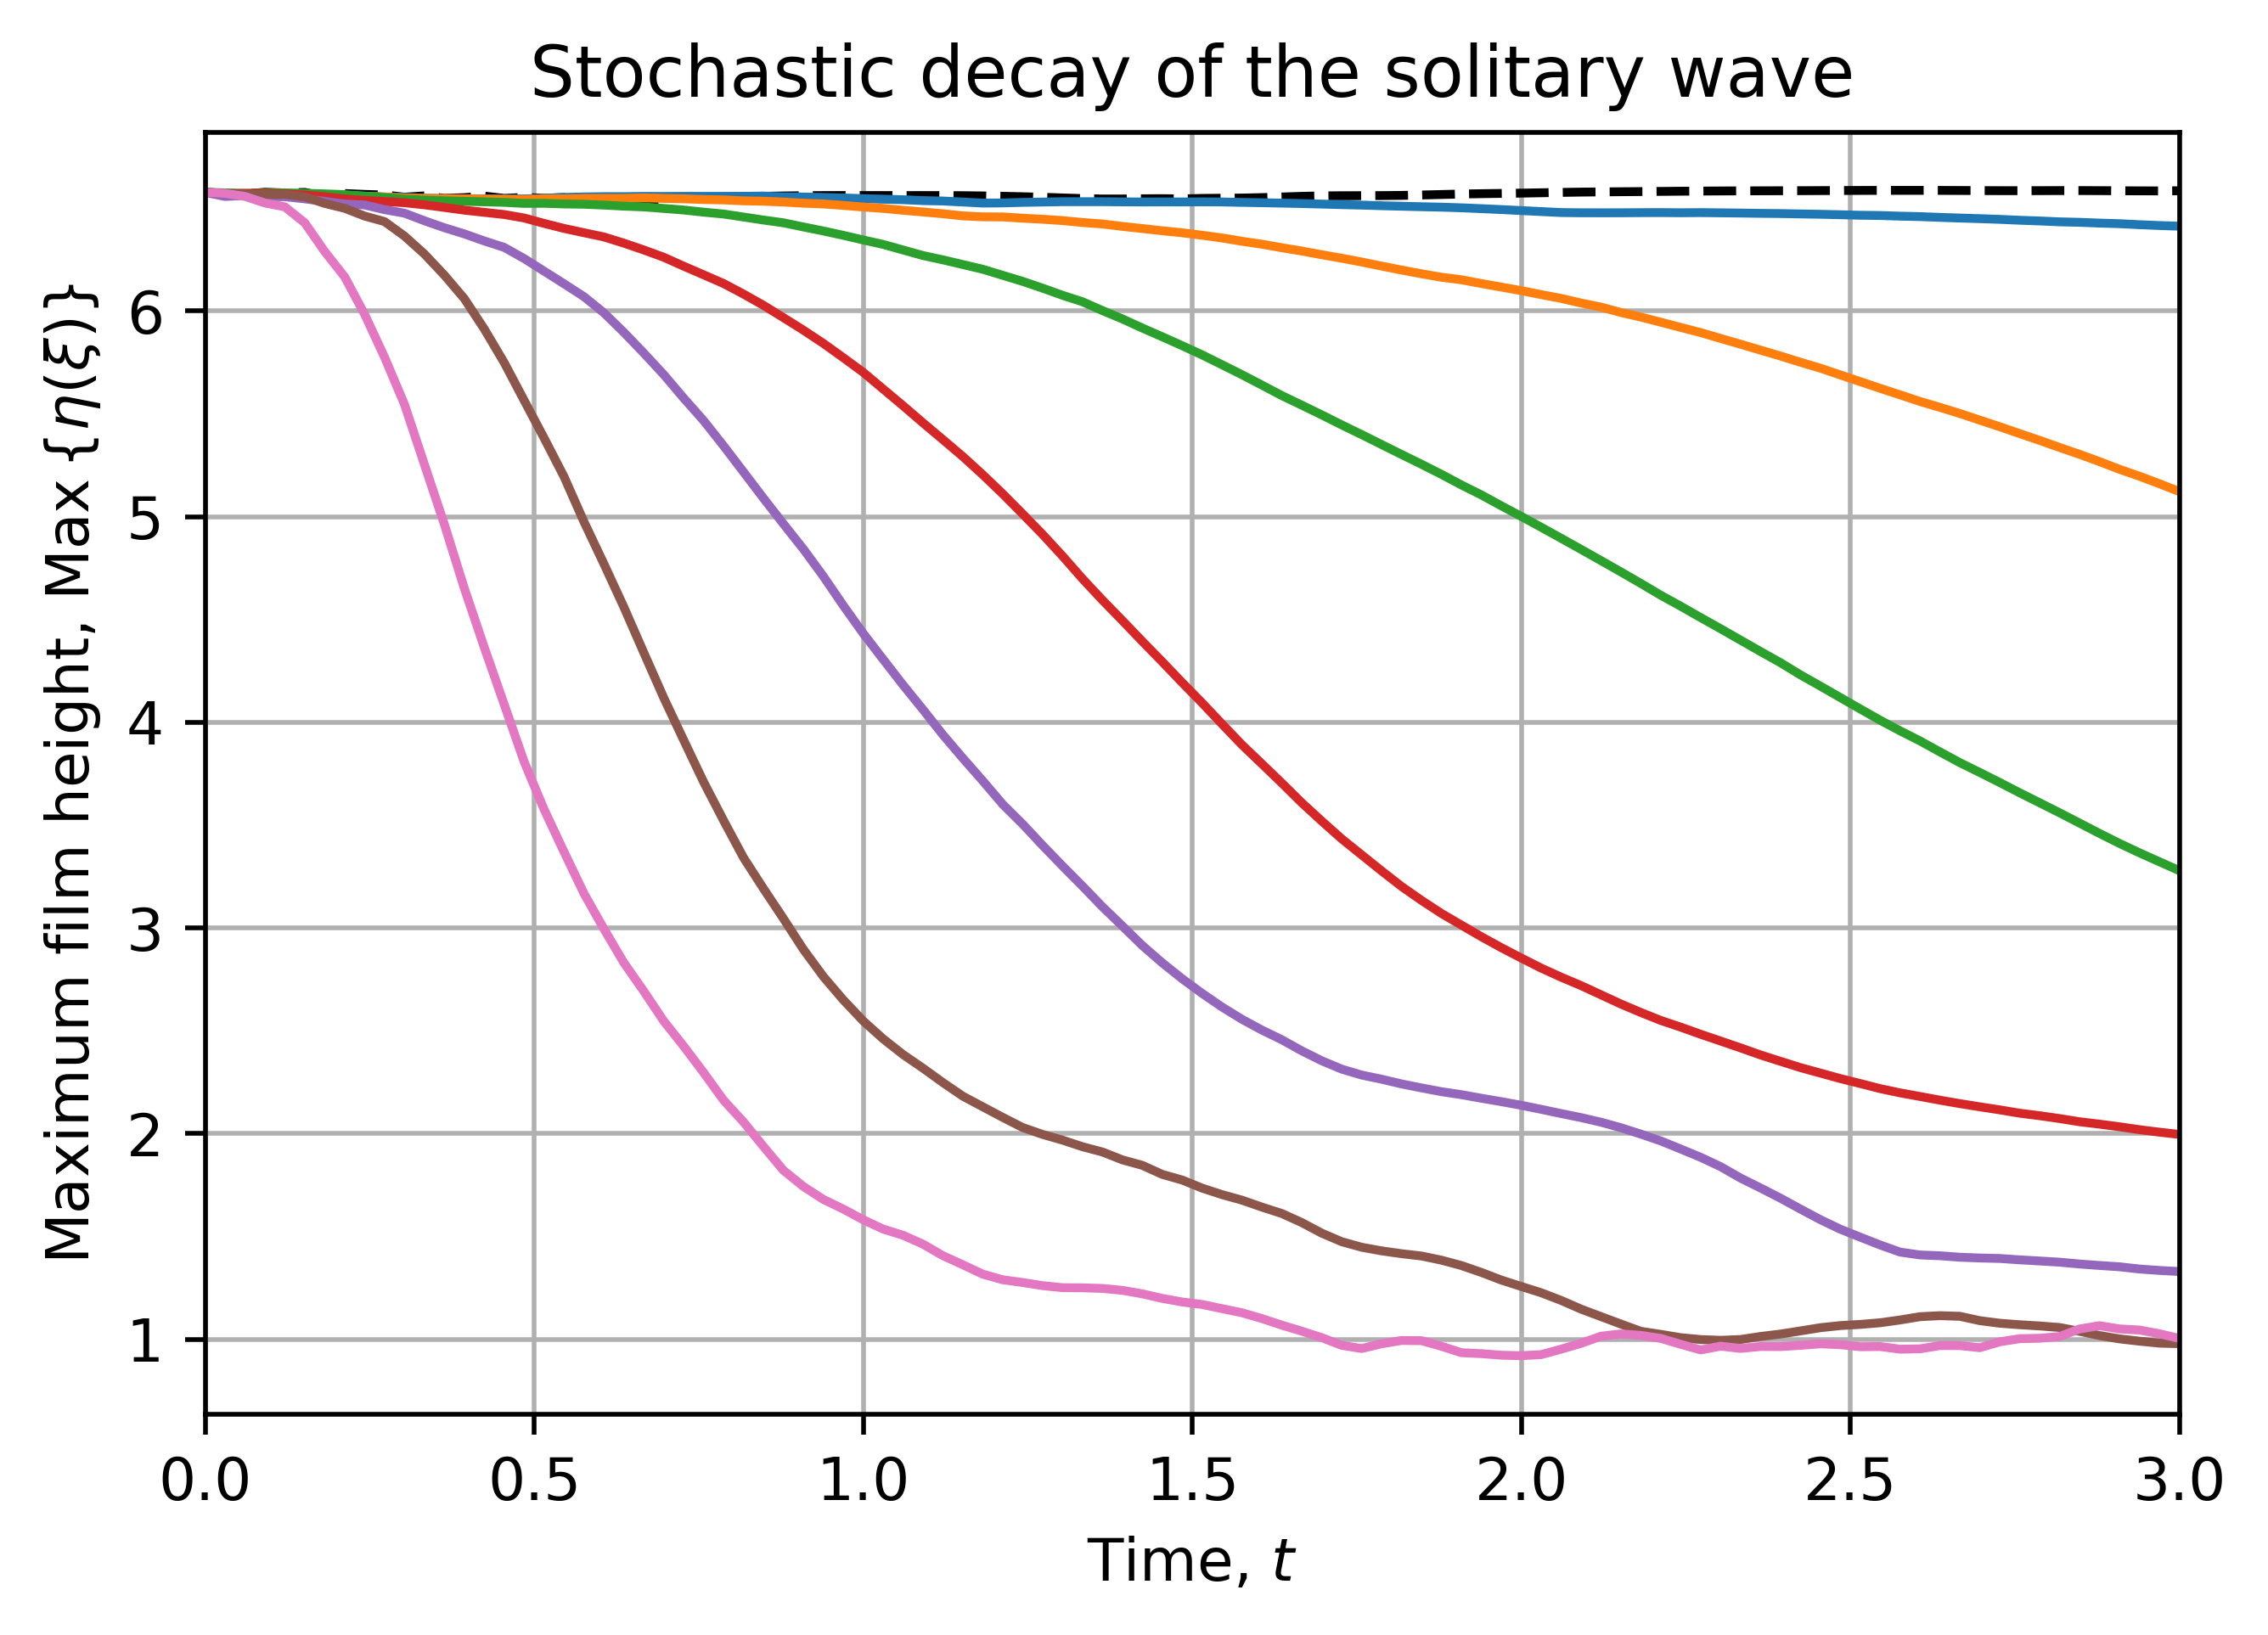

In [97]:
plt.figure(dpi=500)
plt.plot(t, np.max(det_data, axis=0),'--', color='black')
plt.plot(t, np.max(np.mean(vol_point_01, axis=-1), axis=0))
plt.plot(t, np.max(np.mean(vol_point_05, axis=-1), axis=0))
plt.plot(t, np.max(np.mean(vol_point_1, axis=-1), axis=0))
plt.plot(t, np.max(np.mean(vol_point_25, axis=-1), axis=0))
plt.plot(t, np.max(np.mean(vol_point_5, axis=-1), axis=0))
plt.plot(t, np.max(np.mean(vol_1, axis=-1), axis=0))
plt.plot(t, np.max(np.mean(vol_2, axis=-1), axis=0))
plt.grid()
plt.title('Stochastic decay of the solitary wave')
plt.xlabel(r'Time, $t$')
plt.ylabel(r'Maximum film height, $\operatorname{Max}\{\eta(\xi)\}$')
plt.xlim([0,3])

In [79]:
np.trapz(det_data[:,0], z)/(2*np.pi)

0.7520361530326509

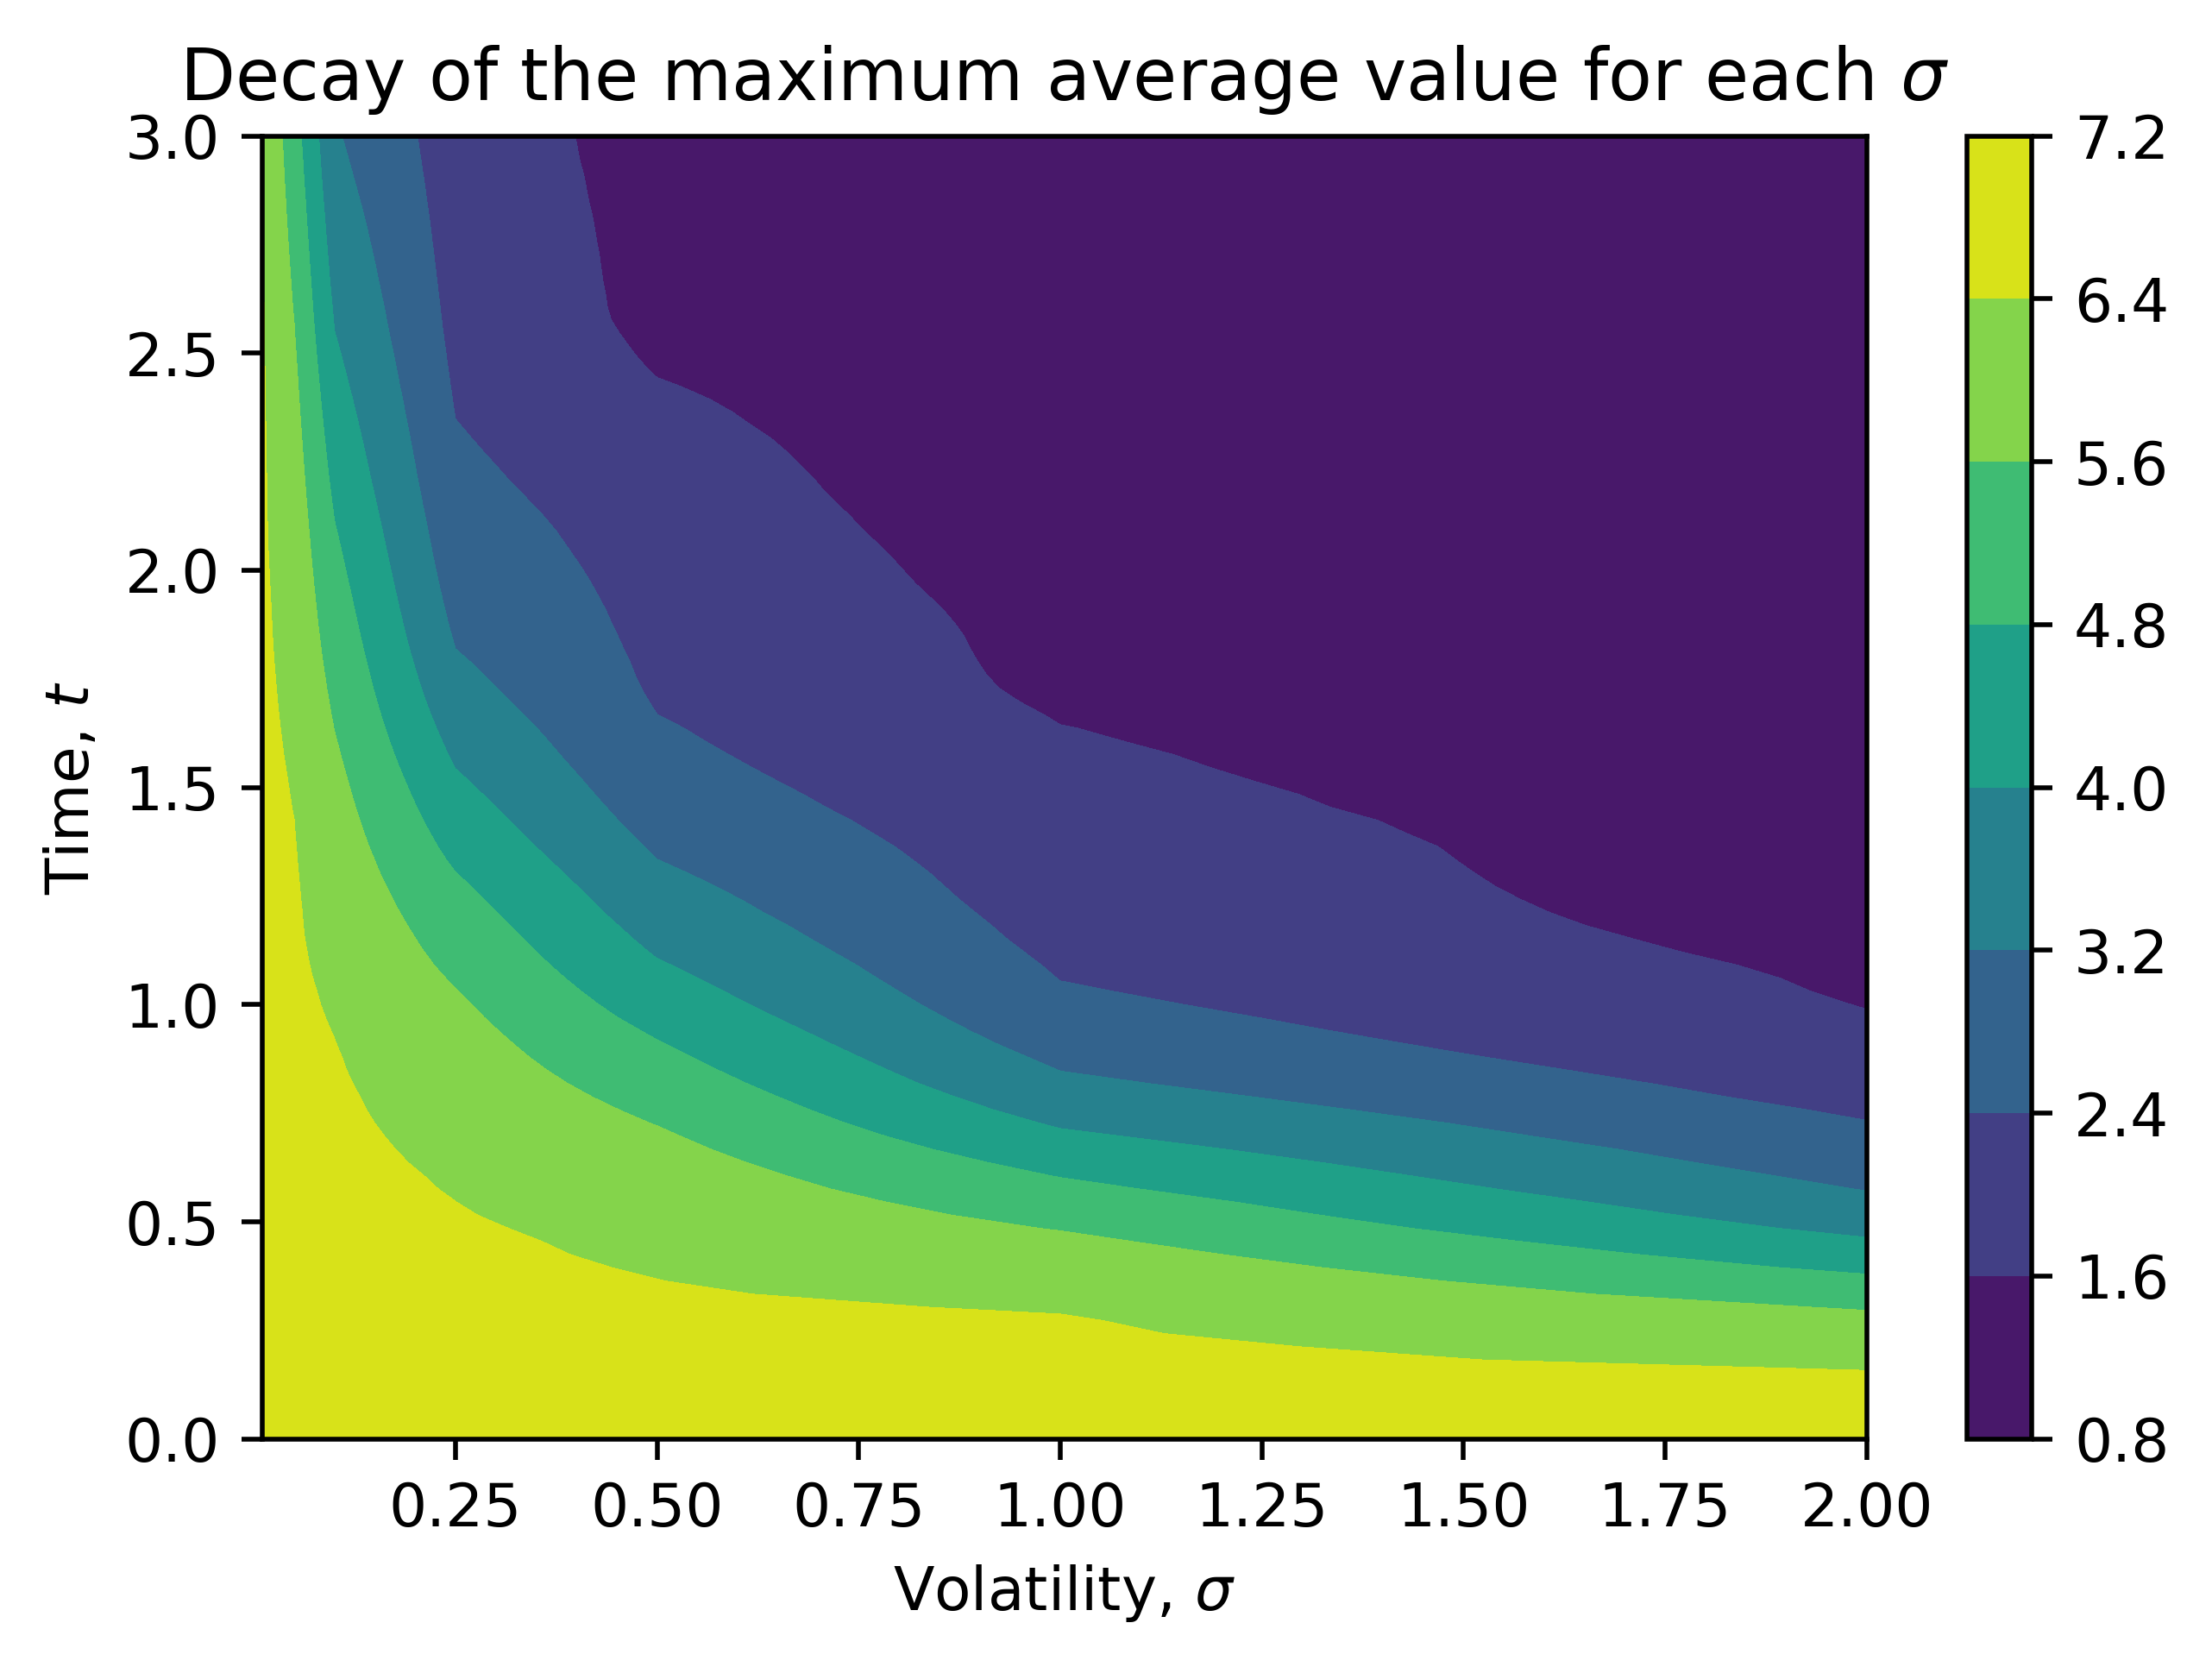

In [122]:
T2, V = np.meshgrid(t, volatility_list)
plt.figure(dpi=500)
plt.contourf(V,T2, np.max(np.mean(big_array, axis=-1), axis =1)); plt.colorbar()
plt.xlabel(r'Volatility, $\sigma$')
plt.ylabel(r'Time, $t$')
plt.title(r'Decay of the maximum average value for each $\sigma$')
plt.show()

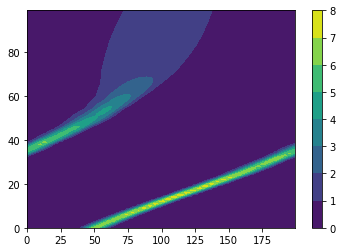

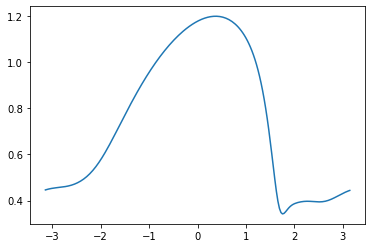

In [60]:
chosen = big_array_bigger_vol[-1, :,:, 1]
plt.contourf(chosen.T)
plt.colorbar()
plt.show()
plt.plot(z,chosen[:,-1])

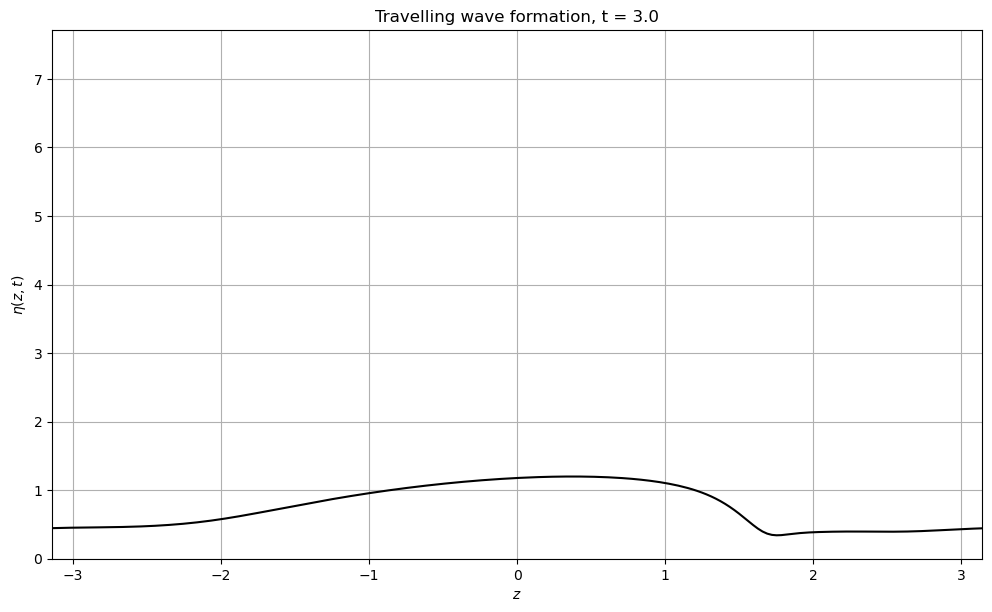

In [62]:
#chosen = big_array_bigger_vol[1, :,:, 1]
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12,7), dpi=100)

def init():
    ax.plot(z,  chosen[:,0])
def update(i):
    ax.cla()
    time = t[i]
    #print(time)
    ax.plot(z, chosen[:,i],color = 'black')
    ax.set_title(fr'Travelling wave formation, t = {round(time,2)}')
    ax.set_ylim([0,np.max(chosen)+0.1])
    ax.set_xlim([np.min(z), np.max(z)])
    ax.set_xlabel(r'$z$')
    ax.set_ylabel(r'$\eta(z,t)$')
    ax.grid()
    fig.set_facecolor('xkcd:white')
    return fig,
ani = FuncAnimation(fig,  update, range(0,100), init_func=init, repeat=False, interval=1)
#writer = PillowWriter(fps = 10)
ani.save(f'movies/stoch_decay_large_vol.gif', writer='imagemagick', fps=25)